# Topics

## Historical Periods

### 1859-1875:
+ 0,"sunday, argument, institution, observance, statement, prove"
+ 2,"country, nation, government, rome, pope, catholic"
+ 8,"instructor, youth, chart, samuel, ofthe, paradise"
+ 9,"pray, message, faithful, trial, satan, trust"
+ 11,"prophecy, beast, sanctuary, message, daniel, vision"
+ 18,"doctrine, resurrection, verse, judgment, throne, king"
+ 20,"wicked, righteous, wrath, immortal, judgment, matt"

health/character
+ 12,"mother, woman, dress, school, girl, parent"
+ 14,"animal, blood, action, food, organ, substance"
+ 15,"moral, principle, character, wrong, rule, justice"
+ 16,"room, morning, line, large, window, sleep"
+ 17,"disease, tobacco, treatment, bath, patient, fever"
+ 19,"food, diet, disease, meat, meal, fruit"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import GoH.modeldata
import GoH.modelviz
import GoH.utilities
import gspread
import matplotlib
from oauth2client.service_account import ServiceAccountCredentials
import os
import pandas as pd

In [3]:
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/jeriwieringa/Dissertation/drafts/code/secrets/dissertation-881847769b13.json', scope)

gc = gspread.authorize(credentials)

In [4]:
colors = ['#4e79a7', '#f28e2b', '#b07aa1']

In [5]:
def create_piechart(df, topic_id, colors):
    return df.groupby('match?')['doc_id'].agg(pd.Series.nunique).plot(kind='pie', 
                                                             colors=colors, 
                                                             shadow=True, 
                                                             startangle=90, 
                                                             autopct='%.2f%%',
                                                             title='Percentage of Top 30 Docs from\nHistorical Period 1859-1875 Model\nthat "Match" Topic {}'.format(topic_id)
                                                            )

In [6]:
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [7]:
base_dir = "/Users/jeriwieringa/Dissertation/drafts/data/module-3/"
model_scheme = "historical-period"
period = "1859-to-1875"

In [8]:
labels = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_topicLabels.csv'.format(model_scheme, period)))

In [9]:
# Topics to filter by
topics = [0,2,8,9,11,18,20,12,14,15,16,17,19]

In [10]:
df = GoH.modeldata.model_to_df(base_dir, model_scheme, period )

In [11]:
df_filtered = GoH.modeldata.filter_dataframe_by_dates(df, 1859, 1870)

## Time Series

In [12]:
time_series = GoH.modeldata.topic_series(df, ['year', 'topic_id'], labels)

In [13]:
ts = time_series[time_series['topic_id'].isin(topics)]

In [14]:
ts = ts.pivot('year', 'topic_words', 'normalized_weight')

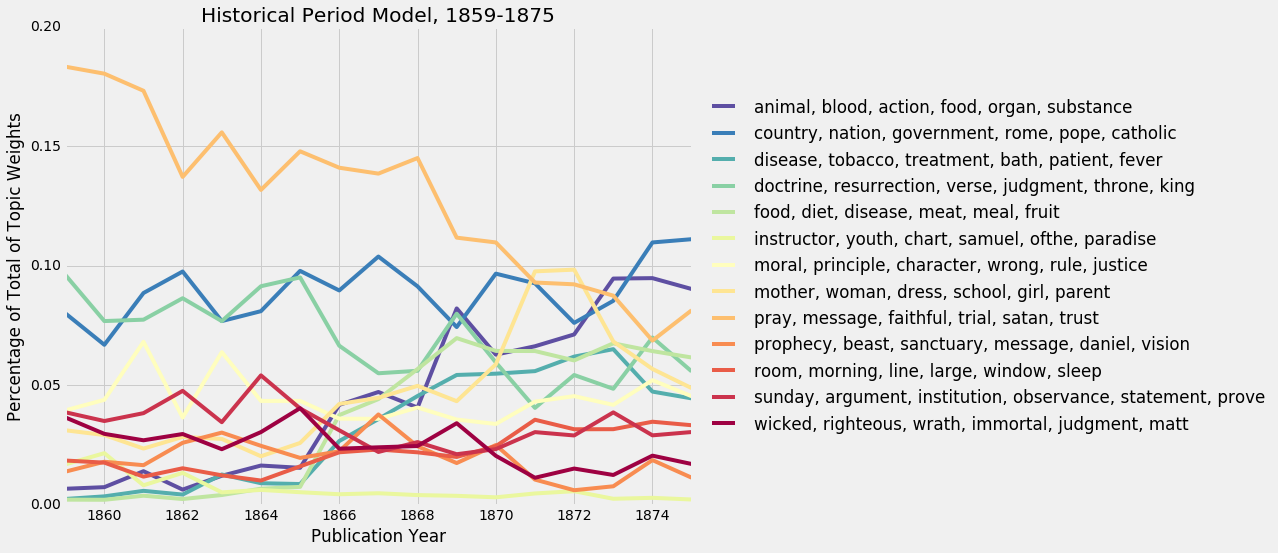

In [15]:
matplotlib.pyplot.figure()
ax = ts.plot(figsize=(10,8), colormap='Spectral_r', title='Historical Period Model, 1859-1875')
ax.set_xlabel("Publication Year")
ax.set_ylabel("Percentage of Total of Topic Weights")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Review Docs

In [16]:
wtm = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_wtm.csv'.format(model_scheme, period)))

In [17]:
dts = gc.open('EvaluateCorpus')
worksheet = dts.get_worksheet(4)

scores = pd.DataFrame(worksheet.get_all_records())

### 9,"pray, message, faithful, trial, satan, trust"

Hypothesis: These documents describe Adventist piety, particularly persevering despite delay of the second coming.

In [18]:
t9 = wtm[wtm['topic_id'] == 9]

In [19]:
print(', '.join(t9['token'].tolist()))

pray, message, faithful, trial, satan, trust, overcome, dear, promise, experience, feeling, seek, mercy, salvation, willing, walk, thee, self, heavenly, praise


In [20]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 9)

In [21]:
df9 = scores[scores['topic'] == 9]

In [22]:
df9

,description,doc_id,match?,topic
1,Letters to RH giving testimony to writers beli...,RH18610402-V17-20-page7.txt,yes,9
2,Letters to RH giving testimony to writers beli...,RH18680526-V31-23-page11.txt,yes,9
3,Letters to RH giving testimony to writers beli...,RH18680630-V32-02-page11.txt,yes,9
4,Letters to RH giving testimony to writers beli...,RH18680706-V32-03-page11.txt,yes,9
5,Letters to RH giving testimony to writers beli...,RH18630127-V21-09-page7.txt,yes,9
6,Long exhortation letters. encouraging persever...,RH18700111-V35-03-page3.txt,yes,9
7,Letters to RH giving testimony to writers beli...,RH18680107-V31-04-page11.txt,yes,9
8,Letters to RH giving testimony to writers beli...,RH18671105-V30-21-page10.txt,yes,9
9,Letters to RH giving testimony to writers beli...,RH18601009-V16-21-page7.txt,yes,9
10,Letters to RH giving testimony to writers beli...,RH18590707-V14-07-page6.txt,yes,9


Conclusion: Strongly tracks with published letters, particularly from readers, and those giving "testimony".

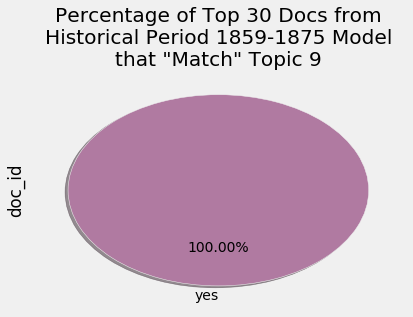

In [23]:
create_piechart(df9, 9, colors[2:])

### 2,"country, nation, government, rome, pope, catholic"

In [24]:
t2 = wtm[wtm['topic_id'] == 2]

In [25]:
print(', '.join(t2['token'].tolist()))

country, nation, government, rome, pope, catholic, europe, religion, history, united, public, england, france, jerusalem, religious, army, roman, bishop, french, american


Hypothesis: Interpretations of historical events, framed as a struggle with Catholicism

In [26]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 2)

In [27]:
df2 = scores[scores['topic'] == 2]

In [28]:
df2

,description,doc_id,match?,topic
32,Historical Department: More on Pius VI and Lou...,RH18670625-V30-02-page6.txt,yes,2
33,Accounting of violent deeds done by men in the...,HR18700101-V04-07-page3.txt,no,2
34,Historical Department: signs of approaching wa...,RH18670723-V30-06-page6.txt,yes,2
35,Historical Department: Pius VI and Bonaparte,RH18670702-V30-03-page6.txt,yes,2
36,News and Miscellany: end of Roman revolution (...,RH18671105-V30-21-page13.txt,yes,2
37,News and Miscellany: Temporal power of the pop...,RH18670101-V29-04-page9.txt,yes,2
38,Historical Department: Papal scheme to subvert...,RH18670910-V30-13-page6.txt,yes,2
39,News and Miscellany: European preparations for...,RH18680211-V31-09-page13.txt,yes,2
40,Historical Department Part 2: downfall of Pius...,RH18670618-V30-01-page7.txt,yes,2
41,Historical Department: the downfall of Pius VI,RH18670709-V30-04-page6.txt,yes,2


Conclusions: Topic primarily captures "signs of the times" materials, both past and modern, particularly the "historical department" and the "news and miscellany" sections. It also seems to capture more general news commentary.

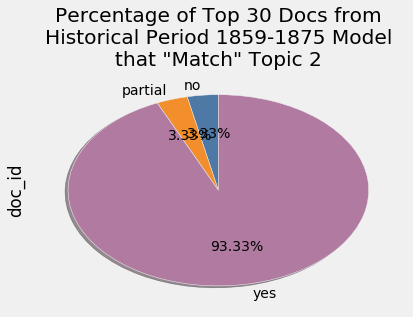

In [29]:
create_piechart(df2, 2, colors)

### 18,"doctrine, resurrection, verse, judgment, throne, king"

In [30]:
t18 = wtm[wtm['topic_id'] == 18]

In [31]:
print(', '.join(t18['token'].tolist()))

doctrine, resurrection, verse, judgment, throne, king, event, text, peter, idea, future, language, reign, raised, satan, apostle, meaning, revelation, hath, jesus_christ


Hypothesis: This is not a clear topic. My guess is that these words capture pages that discuss the SDA doctrine of conditional resurrection and/or the sanctuary doctrine and Christ's work in heaven.

In [32]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 18)

In [33]:
df18 = scores[scores['topic'] == 18]

In [34]:
df18

,description,doc_id,match?,topic
63,order of events in the judgement (#4),RH18691130-V34-23-page4.txt,yes,18
64,"sermon by waggoner on ""setting up the kingdom""",RH18671008-V30-17-page3.txt,yes,18
65,additional accounts of the mortality of the so...,RH18690706-V34-02-page2.txt,yes,18
66,order of events in the judgement (#15); defens...,"RH18700215-V35-08,09-page8.txt",yes,18
67,Loughborough's sermon on the inheritance of th...,RH18590609-V14-03-page2.txt,yes,18
68,seventh-day baptist position on immortality of...,RH18660828-V28-13-page1.txt,yes,18
69,saints inheritance as reigning with Christ. th...,RH18590609-V14-03-page3.txt,yes,18
70,seventh-day baptist position on immortality of...,RH18651107-V26-23-page1.txt,yes,18
71,"discussion of meaning of ""life"" in NT",RH18680728-V32-06-page6.txt,yes,18
72,debate between seventh-day baptist and seventh...,RH18650704-V26-05-page2.txt,yes,18


Conclusion: Tracks strongly with pages on the mortality of the soul and the events of the judgment and second coming. 

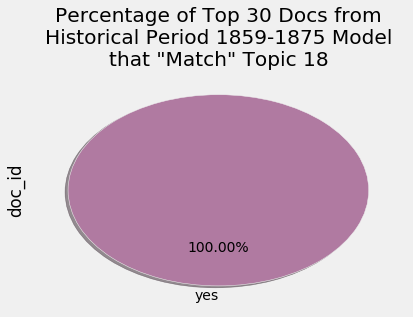

In [35]:
create_piechart(df18, 18, colors[2:])

### 19,"food, diet, disease, meat, meal, fruit"

In [36]:
t19 = wtm[wtm['topic_id'] == 19]

In [37]:
print(', '.join(t19['token'].tolist()))

food, diet, disease, meat, meal, fruit, eating, appetite, drink, medicine, drug, physician, salt, wine, flesh, stomach, health_reform, reform, habit, coffee


Hypothesis: Discussion of the causes of disease as linked to diet and treatment of disease through embrace health reform, rather than drugs of regular physicians.

In [38]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 19)

In [39]:
df19 = scores[scores['topic'] == 19]

In [40]:
df19

,description,doc_id,match?,topic
94,three typical responses to adopting a reform d...,HR18680801-V03-02-page10.txt,yes,19
95,"recipes for ""breads"", fruit puddings; mushes a...",HR18680501-V02-11-page15.txt,yes,19
96,description of hygienic cooking as avoiding im...,HR18680401-V02-10-page3.txt,yes,19
97,drinking at meals leading to tooth decay and l...,HR18670801-V02-02-page11.txt,yes,19
98,"false system of drugs the source of general ""q...",HR18700301-V04-09-page5.txt,yes,19
99,hypothetical discussion on the value of a vege...,RH18680324-V31-15-page5.txt,yes,19
100,"needless experiment of hygienists, such as att...",HR18700401-V04-10-page16.txt,yes,19
101,"discussion of how the ""feast"" is actually unfi...","HR18670601-V01-11,12-page12.txt",yes,19
102,addressing complaint that the health reform di...,HR18700701-V05-01-page10.txt,yes,19
103,testimony of a converted doctor of drug medici...,HR18671201-V02-06-page9.txt,yes,19


Conclusion: descriptions of the health reform diet

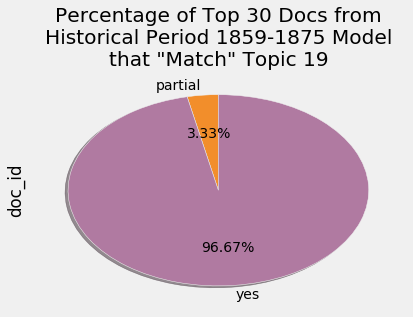

In [41]:
create_piechart(df19, 19, colors[1:])